In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, TimeSeriesSplit
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

np.random.seed(42)

In [ ]:
# Generate synthetic time series returns data
n = 500
time_index = pd.date_range(start="2020-01-01", periods=n, freq="D")
returns = np.random.normal(0, 0.01, size=n)

df = pd.DataFrame({"ret": returns}, index=time_index)
df.head()


,ret
2020-01-01,0.004967
2020-01-02,-0.001383
2020-01-03,0.006477
2020-01-04,0.015230
2020-01-05,-0.002342


In [ ]:
# Create lag and rolling features
df["lag1"] = df["ret"].shift(1)
df["lag2"] = df["ret"].shift(2)
df["rolling_mean_5"] = df["ret"].rolling(5).mean()
df["rolling_std_5"] = df["ret"].rolling(5).std()

# Create classification target: up if next return > 0
df["y"] = (df["ret"].shift(-1) > 0).astype(int)

df = df.dropna()
df.head()


,ret,lag1,lag2,rolling_mean_5,rolling_std_5,y
2020-01-05,-0.002342,0.015230,0.006477,0.004590,0.007082,0
2020-01-06,-0.002341,-0.002342,0.015230,0.003128,0.007711,1
2020-01-07,0.015792,-0.002341,-0.002342,0.006563,0.008929,1
2020-01-08,0.007674,0.015792,-0.002341,0.006803,0.008942,0
2020-01-09,-0.004695,0.007674,0.015792,0.002818,0.008683,1


In [ ]:
# Time-aware split: use most recent 30% as test
split = int(len(df) * 0.7)
train, test = df.iloc[:split], df.iloc[split:]

X_train, y_train = train.drop(columns=["ret", "y"]), train["y"]
X_test, y_test = test.drop(columns=["ret", "y"]), test["y"]


In [ ]:
# Build pipeline
pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("clf", LogisticRegression())
])

pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)


Accuracy: 0.523
Precision: 0.505
Recall: 0.639
F1 Score: 0.564


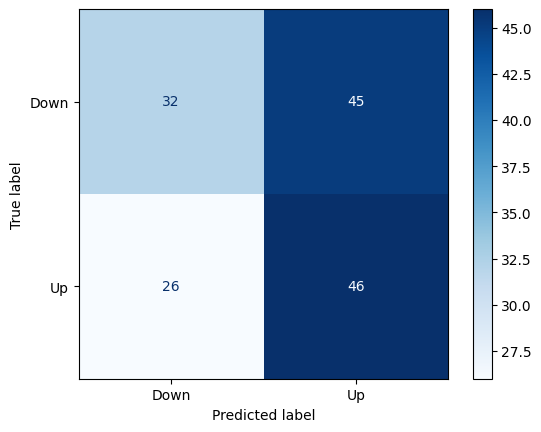

In [ ]:
# Evaluate classification performance
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {acc:.3f}")
print(f"Precision: {prec:.3f}")
print(f"Recall: {rec:.3f}")
print(f"F1 Score: {f1:.3f}")

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Down", "Up"])
disp.plot(cmap="Blues")
plt.show()
